In [35]:
# Importing Libraries
import tensorflow as tf
import os
import numpy as np
import sys
import random
import cv2
import glob
import matplotlib.pyplot as plt
import xlrd

from tqdm import tqdm
from skimage.io import imread, imshow
from skimage.transform import resize

In [36]:
seed = 42
np.random.seed = seed

In [37]:
# Input Image Dimensions
IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 3

In [50]:
# Extracting the label data from excel sheet
path = ('dataset/CamVid/class_dict.xlsx')

labelNames = []
rgbColorCodes = []
wb = xlrd.open_workbook(path) 
sheet = wb.sheet_by_index(0) 
sheet.cell_value(0, 0) 
  
for i in range(1, sheet.nrows): 
    labelNames.append(sheet.cell_value(i, 0)) 
# print(len(labelNames))

for i in range(1, sheet.nrows):
    rgbColorCodes.append((int(sheet.cell_value(i, 1)), int(sheet.cell_value(i, 2)), int(sheet.cell_value(i, 3))))
# print(len(rgbColorCodes))

# Storing label names and corresponding RGB values in dictionaries 
labelID = {i:j for i,j in enumerate(labelNames)}
rgbColorID = {i:j for i,j in enumerate(rgbColorCodes)}

# print(labelID)
# print(rgbColorID)

{0: 'Animal', 1: 'Archway', 2: 'Bicyclist', 3: 'Bridge', 4: 'Building', 5: 'Car', 6: 'CartLuggagePram', 7: 'Child', 8: 'Column_Pole', 9: 'Fence', 10: 'LaneMkgsDriv', 11: 'LaneMkgsNonDriv', 12: 'Misc_Text', 13: 'MotorcycleScooter', 14: 'OtherMoving', 15: 'ParkingBlock', 16: 'Pedestrian', 17: 'Road', 18: 'RoadShoulder', 19: 'Sidewalk', 20: 'SignSymbol', 21: 'Sky', 22: 'SUVPickupTruck', 23: 'TrafficCone', 24: 'TrafficLight', 25: 'Train', 26: 'Tree', 27: 'Truck_Bus', 28: 'Tunnel', 29: 'VegetationMisc', 30: 'Void', 31: 'Wall'}
{0: (64, 128, 64), 1: (192, 0, 128), 2: (0, 128, 192), 3: (0, 128, 64), 4: (128, 0, 0), 5: (64, 0, 128), 6: (64, 0, 192), 7: (192, 128, 64), 8: (192, 192, 128), 9: (64, 64, 128), 10: (128, 0, 192), 11: (192, 0, 64), 12: (128, 128, 64), 13: (192, 0, 192), 14: (128, 64, 64), 15: (64, 192, 128), 16: (64, 64, 0), 17: (128, 64, 128), 18: (128, 128, 192), 19: (0, 0, 192), 20: (192, 128, 128), 21: (128, 128, 128), 22: (64, 128, 192), 23: (0, 0, 64), 24: (0, 64, 64), 25: (192

In [ ]:
def rgb_to_onehot(rgb_image, colormap = id2code):
    '''Function to one hot encode RGB mask labels
        Inputs: 
            rgb_image - image matrix (eg. 256 x 256 x 3 dimension numpy ndarray)
            colormap - dictionary of color to label id
        Output: One hot encoded image of dimensions (height x width x num_classes) where num_classes = len(colormap)
    '''
    num_classes = len(colormap)
    shape = rgb_image.shape[:2]+(num_classes,)
    encoded_image = np.zeros( shape, dtype=np.int8 )
    for i, cls in enumerate(colormap):
        encoded_image[:,:,i] = np.all(rgb_image.reshape( (-1,3) ) == colormap[i], axis=1).reshape(shape[:2])
    return encoded_image

rg

In [38]:
# Processing training datasets
processing = False
X_train = []
Y_train = []
count = 0
if processing:
    print('Resizing training images')
    for filename in glob.glob('dataset/CamVid/train/*.png'):
        img = cv2.imread(filename)
        img = cv2.resize(img, (IMG_WIDTH,IMG_HEIGHT), interpolation = cv2.INTER_AREA)
        height, width, layers = img.shape
        
        if count == 0:
            print(height, width, layers)
            print(type(img))
        count += 1
        size = (width,height)
        X_train.append(img)
        print(count)
    print('Training Data resizing Finished')
    
    
    print('Resizing training masks')
    count = 0
    for filename in glob.glob('dataset/CamVid/train_labels/*.png'):
        img = imread(filename)
        img = resize(img, (IMG_HEIGHT, IMG_HEIGHT), mode='constant', preserve_range=True)
        count += 1
        Y_train.append(img)
        print(count)
    print('Training Mask resizing Finished')

    
    X_train = np.array(X_train)
    print(type(X_train))
    np.save('NPY files/trainingNPYfiles/MultiClassTrainingData', X_train)
    
    Y_train = np.array(Y_train)
    print(type(Y_train))
    np.save('NPY files/trainingNPYfiles/MultiClassMasks', Y_train)

else:
    print('Input image already processed. Modify processing parameter to False to process input images again.')
    
    

Input image already processed. Modify processing parameter to False to process input images again.


369


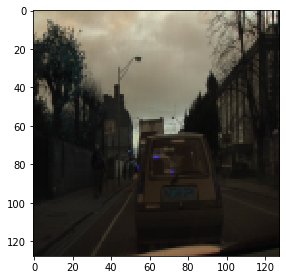

D:\anaconda3\envs\tensorflow\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(369, 128, 128, 3)
369


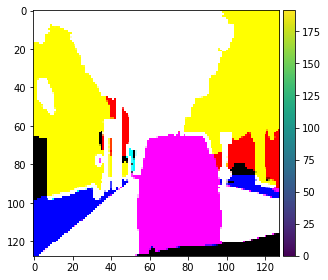

(369, 128, 128, 3)


In [39]:
X_train = np.load('NPY files/trainingNPYfiles/MultiClassTrainingData.npy')
print(len(X_train))
imshow(X_train[2])
plt.show()
print(X_train.shape)

Y_train = np.load('NPY files/trainingNPYfiles/MultiClassMasks.npy')
print(len(Y_train))
imshow(np.squeeze(Y_train[2]))
plt.show()
print(X_train.shape)

In [40]:
# Processing testing datasets
processTest = False
count = 0
X_test = []
if processTest:
    print('Resizing testing images')

    for filename in glob.glob('dataset/CamVid/test/*.png'):
        img = cv2.imread(filename)
        img = cv2.resize(img, (IMG_WIDTH,IMG_HEIGHT), interpolation = cv2.INTER_AREA)
        height, width, layers = img.shape
        
        if count == 0:
            print(height, width, layers)
            print(type(img))
        count += 1
        size = (width,height)
        X_test.append(img)
        print(count)
    print('Testing Data resizing Finished')
    
    # This is done to avoid redundant processing
    X_test = np.array(X_test)
    print(type(X_test))
    np.save('NPY files/testingNPYfiles/MultiClassTestingData', X_test)
else:
    print('Testing images already processed. Modify processTest parameter to False to process testing images again.')

Testing images already processed. Modify processTest parameter to False to process testing images again.


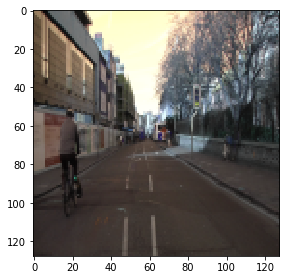

D:\anaconda3\envs\tensorflow\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


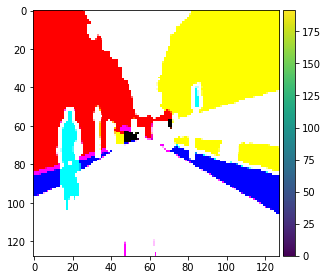

In [13]:
# Validating
X_train = np.load('NPY files/trainingNPYfiles/MultiClassTrainingData.npy')
imageX = random.randint(0, len(X_train))
imshow(X_train[imageX])
plt.show()

Y_train = np.load('NPY files/trainingNPYfiles/MultiClassMasks.npy')
imshow(np.squeeze(Y_train[imageX]))
plt.show()

In [32]:
# Building the U-net model
inputs = tf.keras.layers.Input((IMG_WIDTH, IMG_HEIGHT, IMG_CHANNELS)) # Defining the input layer
# s = tf.keras.layers.Lambda(lambda x: x/255)(inputs) # Converting input pixels to floating values

c1 = tf.keras.layers.Conv2D(32, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(inputs)
c1 = tf.keras.layers.Dropout(0.1)(c1) # To prevent neural net from over fitting
c1 = tf.keras.layers.Conv2D(32, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
p1 = tf.keras.layers.MaxPooling2D((2,2))(c1)

c2 = tf.keras.layers.Conv2D(64, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2) # To prevent neural net from over fitting
c2 = tf.keras.layers.Conv2D(64, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = tf.keras.layers.MaxPooling2D((2,2))(c2)

c3 = tf.keras.layers.Conv2D(128, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3) # To prevent neural net from over fitting
c3 = tf.keras.layers.Conv2D(128, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = tf.keras.layers.MaxPooling2D((2,2))(c3)

c4 = tf.keras.layers.Conv2D(256, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4) # To prevent neural net from over fitting
c4 = tf.keras.layers.Conv2D(256, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = tf.keras.layers.MaxPooling2D((2,2))(c4)

c5 = tf.keras.layers.Conv2D(512, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
c5 = tf.keras.layers.Dropout(0.3)(c5) # To prevent neural net from over fitting
c5 = tf.keras.layers.Conv2D(512, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

# Decoding the layers
u6 = tf.keras.layers.Conv2DTranspose(256, (2,2), strides=(2,2), padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(256, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6) # To prevent neural net from over fitting
c6 = tf.keras.layers.Conv2D(256, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)

u7 = tf.keras.layers.Conv2DTranspose(128, (2,2), strides=(2,2), padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(128, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7) # To prevent neural net from over fitting
c7 = tf.keras.layers.Conv2D(128, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)

u8 = tf.keras.layers.Conv2DTranspose(64, (2,2), strides=(2,2), padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(64, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.1)(c8) # To prevent neural net from over fitting
c8 = tf.keras.layers.Conv2D(64, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)

u9 = tf.keras.layers.Conv2DTranspose(32, (2,2), strides=(2,2), padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
c9 = tf.keras.layers.Conv2D(32, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.1)(c9) # To prevent neural net from over fitting
c9 = tf.keras.layers.Conv2D(32, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
 
outputs = tf.keras.layers.Conv2D(32, (1,1), activation='softmax', padding='same')(c9)

model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv2d_76 (Conv2D)              (None, 128, 128, 32) 896         input_5[0][0]                    
__________________________________________________________________________________________________
dropout_36 (Dropout)            (None, 128, 128, 32) 0           conv2d_76[0][0]                  
__________________________________________________________________________________________________
conv2d_77 (Conv2D)              (None, 128, 128, 32) 9248        dropout_36[0][0]                 
____________________________________________________________________________________________

In [33]:
# Model Checkpoint
checkpointer = tf.keras.callbacks.ModelCheckpoint('model_for_nuclei.h5', verbose=1, save_best_only=True)

callbacks = [
             tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_loss'),
             tf.keras.callbacks.TensorBoard(log_dir='logs')]

In [34]:
results = model.fit(X_train, Y_train, validation_split=0.1, batch_size=16, epochs=100,callbacks=callbacks)

ValueError: A target array with shape (369, 128, 128, 3) was passed for an output of shape (None, 128, 128, 32) while using as loss `categorical_crossentropy`. This loss expects targets to have the same shape as the output.

In [24]:
X_test = np.load('NPY files/testingNPYfiles/MultiClassTestingData.npy')

In [25]:
# idx = random.randint(0, len(X_train))

# preds_train = model.predict(X_train[:int(X_train.shape[0]*0.9)], verbose=1)
# preds_val = model.predict(X_train[int(X_train.shape[0]*0.9):], verbose=1)
# preds_test = model.predict(X_test[0:int(len(X_test)/10)], verbose=1)
# # preds_test1 = model.predict(X_test[int(len(X_test)/4):int(len(X_test)/2)], verbose=1)
# # preds_test2 = model.predict(X_test[int(len(X_test)/2):], verbose=1)
# # preds_test3 = model.predict(X_test[0:int(len(X_test)/4)], verbose=1)

# preds_train_t = (preds_train > 0.5).astype(np.uint8)
# preds_val_t = (preds_val > 0.5).astype(np.uint8)
# preds_test_t = (preds_test > 0.5).astype(np.uint8)
idx = random.randint(0, len(X_train))

preds_train = model.predict(X_train[:int(X_train.shape[0]*0.9)], verbose=1)
preds_val = model.predict(X_train[int(X_train.shape[0]*0.9):], verbose=1)
preds_test = model.predict(X_test, verbose=1)

preds_train_t = (preds_train > 0.5).astype(np.uint8)
preds_val_t = (preds_val > 0.5).astype(np.uint8)
preds_test_t = (preds_test > 0.5).astype(np.uint8)

232/232 [==============================] - 2s 7ms/sample


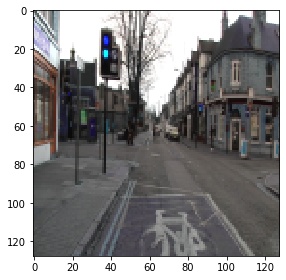

D:\anaconda3\envs\tensorflow\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


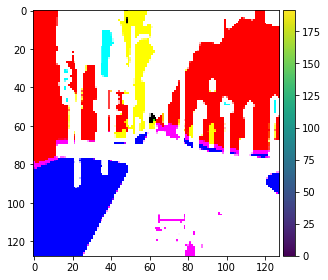

D:\anaconda3\envs\tensorflow\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


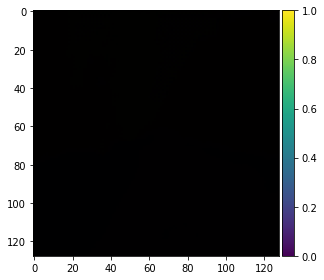

In [26]:
ix = random.randint(0, len(preds_train_t))
imshow(X_train[ix])
plt.show()
imshow(np.squeeze(Y_train[ix]))
plt.show()
imshow(np.squeeze(preds_train_t[ix]))
plt.show()

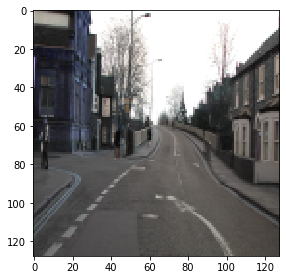

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


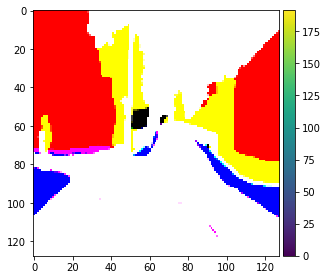

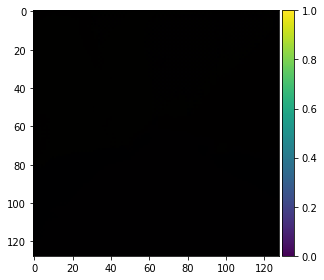

37


In [27]:
ix = random.randint(0, len(preds_val_t))
imshow(X_train[int(X_train.shape[0]*0.9):][ix])
plt.show()
imshow(np.squeeze(Y_train[int(Y_train.shape[0]*0.9):][ix]))
plt.show()
imshow(np.squeeze(preds_val_t[ix]))
plt.show()
print(len(preds_val_t))

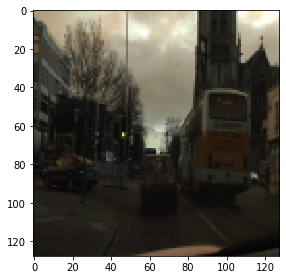

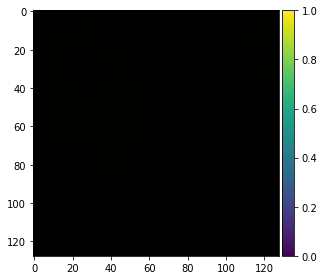

In [28]:
ix = random.randint(0, len(preds_test_t))
imshow(X_test[ix])
plt.show()
imshow(np.squeeze(preds_test_t[ix]))
plt.show()

In [17]:
# Making a video out of input test images
make_video = False

if make_video:
      # This is done to individually compare the test output images with the test input images
#     for i in range(len(X_test)):
#         imshow(X_test[i])
#         plt.savefig('inputTestImages/input' + str(i) + '.jpg')
#         plt.show()
    
    out = cv2.VideoWriter('Output/video/inputVideo.avi',cv2.VideoWriter_fourcc(*'DIVX'), 0.8, (128, 128))

    for i in range(len(X_test)):
        out.write(X_test[i])
    out.release()

In [18]:
# Making a video out of output test images
make_video = False

if make_video:
    # Saving all the images in outputImages folder
    for i in range(len(preds_test_t)):
            imshow(np.squeeze(preds_test_t[i]))
            plt.savefig('Output/outputImages/output' + str(i) + '.jpg')
            plt.show()

    img_array = []
    for filename in glob.glob('Output/outputImages/*.jpg'):
        img = cv2.imread(filename)
        height, width, layers = img.shape
#         print(height, width, layers)
        size = (width,height)
        img_array.append(img)


    out = cv2.VideoWriter('Output/video/SegmentedOutput.avi',cv2.VideoWriter_fourcc(*'DIVX'), 0.8, (432,288))

    for i in range(len(img_array)):
        out.write(img_array[i])
    out.release()

In [ ]:
!tensorboard --logdir=logs/ --host localhost --port 8098